![Typing SVG](https://readme-typing-svg.demolab.com/?lines=SENTIMENT+ANALYSIS+OF+MOVIE+REVIEWS+NLP)

## <center>Sentiment Analysis of Movie Reviews using NLP with TF-IDF and ML Models
---
<div> 
     <center>  <b><br> <center> Project Type: Natural Language Processing (NLP) Project<br></b><center>  <b><br>  <center> Author Name: Din Mohammad Dohan<br></b>
 <center>  <b><br> <center> Publising Date: November 27, 2023<br></b>
</div>

![](https://i.imgur.com/6Wfmf2S.png)

> The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis. The sentiment labels are:

- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & Compare different ML models
3. Document & notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

In [21]:
import os

In [22]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [24]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

Traceback (most recent call last):
  File "c:\users\dsai5\appdata\local\programs\python\python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\dsai5\appdata\local\programs\python\python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\dsai5\AppData\Local\Programs\Python\Python37\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "c:\users\dsai5\appdata\local\programs\python\python37\lib\site-packages\kaggle\__init__.py", line 6, in <module>
    api.authenticate()
  File "c:\users\dsai5\appdata\local\programs\python\python37\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 437, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [25]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [27]:
import pandas as pd

In [28]:
"C:\\Users\\dsai5\\Downloads\\sampleSubmission\\train 2.tsv"

'C:\\Users\\dsai5\\Downloads\\sampleSubmission\\train 2.tsv'

In [29]:

raw_df = pd.read_csv("C:\\Users\\dsai5\\Downloads\\sampleSubmission\\train 2.tsv", sep="\t")
raw_df


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [30]:
raw_df.Phrase.sample(10).values


array(["'s a perfect show of respect to just one of those underrated professionals who deserve but rarely receive it",
       'contrived , unmotivated , and psychologically unpersuasive',
       'depressing to see how far Herzog has fallen', "who 's ever",
       'makes an unusual but pleasantly haunting debut behind the camera .',
       'never rise above the level of an after-school TV special',
       'Dungeons and',
       "You can sip your vintage wines and watch your Merchant Ivory productions ; I 'll settle for a nice cool glass of iced tea and a Jerry Bruckheimer flick any day of the week .",
       'a sheer unbridled delight', 'smarter than your average Bond'],
      dtype=object)

In [31]:
test_df = pd.read_csv("C:\\Users\\dsai5\\Downloads\\sampleSubmission\\test.tsv", sep='\t')
test_df


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [32]:
sub_df = pd.read_csv("C:\\Users\\dsai5\\Downloads\\sampleSubmission\\sampleSubmission.csv")
sub_df


,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [33]:
raw_df.Sentiment.value_counts(normalize =True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

<AxesSubplot:>

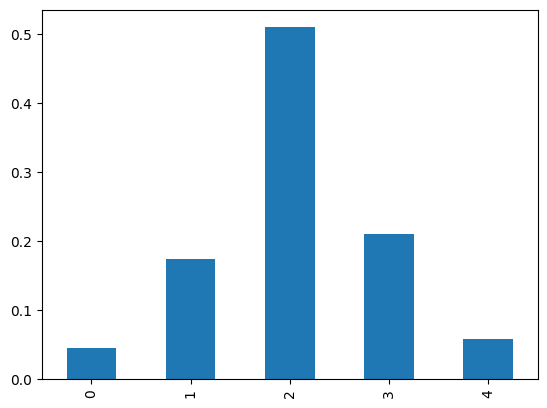

In [34]:
raw_df.Sentiment.value_counts(normalize =True).sort_index().plot(kind='bar')

Summarize your insights and learnings from the dataset below:

* Distribution of Sentiments: The dataset contains sentiment labels ranging from 0 to 4, representing negative to positive sentiments. From the provided data, it appears that neutral sentiments (label 2) have the highest representation, followed by somewhat positive (label 3) and somewhat negative (label 1) sentiments. Negative (label 0) and positive (label 4) sentiments have lower representation.
* Sentiment Intensity: The numerical values associated with each sentiment may represent the intensity or strength of that sentiment. For example, sentiment label 2 (neutral) has the highest numerical value, which might suggest a moderate intensity of sentiment, while sentiment labels 0 and 4 (negative and positive) have lower numerical values, suggesting lower intensity.
* Data Balance: Depending on the context and application, it's important to consider the balance of sentiment labels in the dataset. In this case, there appears to be an imbalance, with neutral sentiments dominating the dataset. This could impact the performance of sentiment analysis models, as they may become biased towards predicting neutral sentiments.

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [35]:
from nltk.tokenize import word_tokenize

In [36]:
import nltk

In [37]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dsai5\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [38]:
word_tokenize('you really wanna go with us?, that would be fantasy')

['you',
 'really',
 'wan',
 'na',
 'go',
 'with',
 'us',
 '?',
 ',',
 'that',
 'would',
 'be',
 'fantasy']

In [39]:
from nltk.stem.snowball import SnowballStemmer

In [40]:
stemmer = SnowballStemmer(language='english')

In [41]:
stemmer.stem('going')

'go'

In [42]:
def tokenize (text):
   return [stemmer.stem(token) for token in word_tokenize(text)]

In [43]:
tokenize ('you really wanna go with us?, that would be fantasy')

['you',
 'realli',
 'wan',
 'na',
 'go',
 'with',
 'us',
 '?',
 ',',
 'that',
 'would',
 'be',
 'fantasi']

In [44]:
def tokenizeWithoutPunctuation (text):
   return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [45]:
tokenizeWithoutPunctuation ('you really wanna go with us?, that would be fantasy')

['you',
 'realli',
 'wan',
 'na',
 'go',
 'with',
 'us',
 'that',
 'would',
 'be',
 'fantasi']

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dsai5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords

In [48]:
english_stopwords = stopwords.words('english')

In [49]:
english_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [50]:
','.join(english_stopwords)

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our,ours,ourselves,out,over,own,re,s,same,shan,shan't,she,she'd,she'll,she's,should,shouldn,shouldn't,should've,so,some,such,t,than,that,that'll,the,their,theirs,them,themselves,then,there,these,they,they'd,they'll,they're,they've,this,those,through,to,too,under,until,up,ve,very,was,wasn,wasn't,we,we'd,we'll,we're,were,weren,weren't,we've,what,when,where,which,while,who,whom,why,will,with,won,won't,wouldn,wouldn't,y,you,you'd,you

In [51]:
selected_stopwords = english_stopwords[:115]

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer(tokenizer =tokenizeWithoutPunctuation,
                            stop_words=selected_stopwords,
                            ngram_range=(1,2),
                            max_features =2000)


In [54]:
vectorizer.fit(raw_df.Phrase)

c:\Users\dsai5\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
c:\Users\dsai5\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', 'need', 'onc', 'onli'] not in stop_words.
  % sorted(inconsistent)


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenizeWithoutPunctuation at 0x000002CEBB05A8C8>)

In [55]:
len (vectorizer.vocabulary_)

2000

In [56]:
vectorizer.get_feature_names_out()[:200]

array(['abil', 'abil to', 'abl', 'abl to', 'abov', 'absolut', 'absorb',
       'abstract', 'absurd', 'accent', 'accept', 'access', 'accomplish',
       'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'admir', 'admit',
       'adolesc', 'adult', 'adventur', 'affair', 'affect', 'age', 'ago',
       'ahead', 'aim', 'air', 'alien', 'aliv', 'allen', 'allow', 'almost',
       'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway',
       'amateurish', 'amaz', 'ambigu', 'ambit', 'ambiti', 'america',
       'american', 'among', 'amount', 'amus', 'analyz', 'angst', 'ani',
       'ani the', 'anim', 'annoy', 'anoth', 'answer', 'anyon',
       'anyon who', 'anyth', 'apart', 'appar', 'appeal', 'appeal to',
       'appear', 'appreci', 'approach', 'area', 'argu', 'around', 'arriv',
       'art', 'artifici', 'artist', 'ask', 'aspect', 'aspir', 'assassin',
   

## Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [57]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [58]:
inputs =  vectorizer.transform(raw_df.Phrase)

In [59]:
inputs.shape

(156060, 2000)

In [60]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22672932,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.27107452, 0.24064156, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [61]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [62]:
test_inputs =  vectorizer.transform(test_df.Phrase)

In [63]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle

### Split Training and Validation Sets

In [64]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [65]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 612722 stored elements in Compressed Sparse Row format>

In [66]:
TRAIN_SIZE =110_000

In [67]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [68]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [69]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [70]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

## Model 1 - Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr_model = LogisticRegression(verbose=2, n_jobs= 1, max_iter=500)

In [75]:
lr_model.fit(train_inputs, train_targets)

LogisticRegression(max_iter=500, n_jobs=1, verbose=2)

In [76]:
train_preds = lr_model.predict(train_inputs)

In [77]:
train_preds

array([3, 2, 2, ..., 0, 0, 2], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(train_targets,train_preds)

0.6355909090909091

In [80]:
val_preds = lr_model.predict(val_inputs)

In [81]:
accuracy_score(val_targets, val_preds)

0.5745766391663049

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Define a grid of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],          # L1 or L2 regularization
    'C': [0.001, 0.01, 0.1, 1, 1],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=1)

# Fit the grid search to the data (replace 'train_inputs' and 'train_targets' with your actual training data and labels)
grid_search.fit(train_inputs, train_targets)

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the training and validation data using the best model
train_preds = best_model.predict(train_inputs)
val_preds = best_model.predict(val_inputs)

# Evaluate the best model on the training and validation sets
train_accuracy = best_model.score(train_inputs, train_targets)
val_accuracy = best_model.score(val_inputs, val_targets)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


c:\Users\dsai5\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\dsai5\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Best Hyperparameters:
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.6354
Validation Accuracy: 0.5749


c:\Users\dsai5\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [84]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [85]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 235561 stored elements in Compressed Sparse Row format>

In [86]:
best_test_preds = best_model.predict(test_inputs)

In [87]:
best_test_preds

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [88]:
sub_df.Sentiment = best_test_preds

In [89]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [90]:
sub_df.to_csv('submission.csv', index=None)

## Study Predictions on Sample Inputs

In [91]:
small_df = raw_df.sample(20)
small_df

,PhraseId,SentenceId,Phrase,Sentiment
26200,26201,1200,soggy near miss,2
77381,77382,3980,liked the previous movies,2
52798,52799,2615,"fine , nuanced lead performances",3
105765,105766,5583,bug things,2
10001,10002,420,production from a bygone era,2
73296,73297,3743,of unrecoverable life,1
36344,36345,1718,little film,2
103847,103848,5475,"A fine film , but it would be a lot better if ...",2
84983,84984,4393,no understanding,2
15153,15154,651,period filmmaking,2


In [92]:
small_inputs =  vectorizer.transform(small_df.Phrase)

In [93]:
small_inputs.shape

(20, 2000)

In [94]:
small_preds = lr_model.predict(small_inputs)

In [95]:
small_preds

array([1, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2],
      dtype=int64)

## Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of my score

In [96]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [97]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 235561 stored elements in Compressed Sparse Row format>

In [98]:
test_preds = lr_model.predict(test_inputs)

In [99]:
test_preds

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [100]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [101]:
sub_df.Sentiment = test_preds

In [102]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [103]:
sub_df.to_csv('submission.csv', index=None)

## Train & Compare Different ML Models


Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

## Model 2 - Naive Bayes

In [104]:
from sklearn.naive_bayes import MultinomialNB

In [105]:
nb_model = MultinomialNB()

In [106]:
nb_model.fit(train_inputs,train_targets)

MultinomialNB()

In [107]:
nb_train_preds = nb_model.predict(train_inputs)

In [108]:
accuracy_score(train_targets, nb_train_preds)

0.5826

In [109]:
nb_val_preds = nb_model.predict(val_inputs)

In [110]:
accuracy_score(val_targets,nb_val_preds )

0.5427268779852367

## Model 3 - Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)

In [113]:
gb_model.fit(train_inputs,train_targets)

GradientBoostingClassifier(learning_rate=1.0, random_state=0)

In [114]:
gb_train_preds = gb_model.predict(train_inputs)

In [115]:
accuracy_score(train_targets, gb_train_preds)

0.5666909090909091

In [116]:
gb_val_preds = gb_model.predict(val_inputs)

In [117]:
accuracy_score(val_targets, gb_val_preds )

0.5267911419887104

## Model 4 - Decision Trees

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dt_model = DecisionTreeClassifier()

In [121]:
dt_model.fit(train_inputs,train_targets)

DecisionTreeClassifier()

In [122]:
dt_train_preds = dt_model.predict(train_inputs)

In [123]:
accuracy_score(train_targets, dt_train_preds)

0.8066909090909091

In [124]:
dt_val_preds = dt_model.predict(val_inputs)

In [125]:
accuracy_score(val_targets, dt_val_preds )

0.5100955275727312

## Model 5 - Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf_model = RandomForestClassifier()

In [128]:
rf_model.fit(train_inputs,train_targets)

RandomForestClassifier()

In [129]:
rf_train_preds = rf_model.predict(train_inputs)

In [130]:
accuracy_score(train_targets, rf_train_preds)

0.8066818181818182

In [131]:
rf_val_preds = rf_model.predict(val_inputs)

In [132]:
accuracy_score(val_targets, rf_val_preds )

0.5491532783326096

## Model 6 - SVM

In [133]:
from sklearn.svm import SVC

In [134]:
svm_model = SVC()

In [ ]:
svm_model.fit(train_inputs,train_targets)

In [ ]:
svm_train_preds = svm_model.predict(train_inputs)

In [ ]:
accuracy_score(train_targets, svm_train_preds)

0.7417090909090909

In [ ]:
svm_val_preds = svm_model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, svm_val_preds )

0.5775075987841946

Best Model:

Logistic Regression

(include Kaggle score screenshot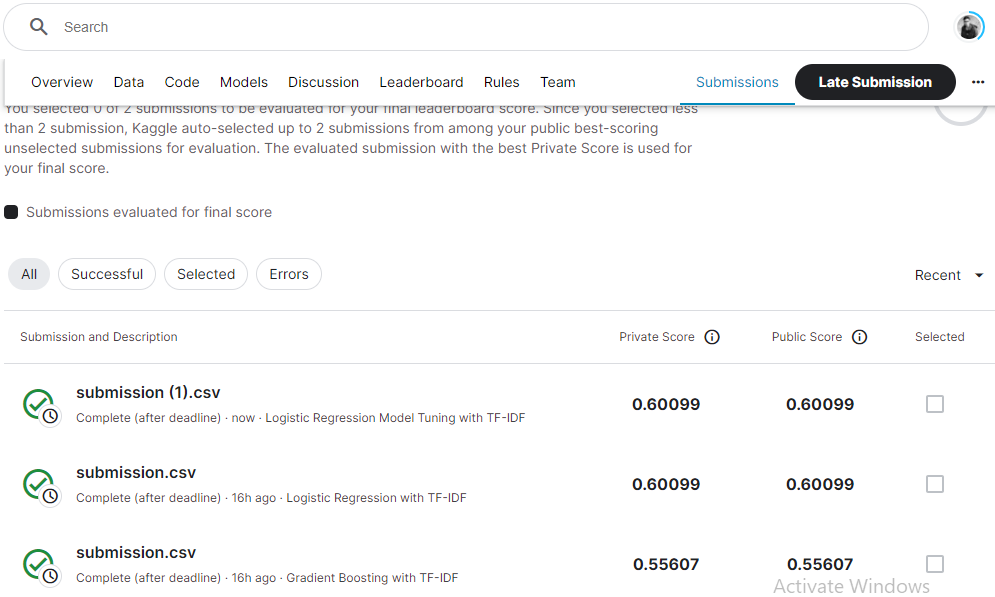)

## Future Work

- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words


## <center> Thanks for checking it out! Don't forget to upvote!!